In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import datetime

In [2]:
df_songs = pd.read_csv("songs_normalize.csv")

In [3]:
df_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
df_songs.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


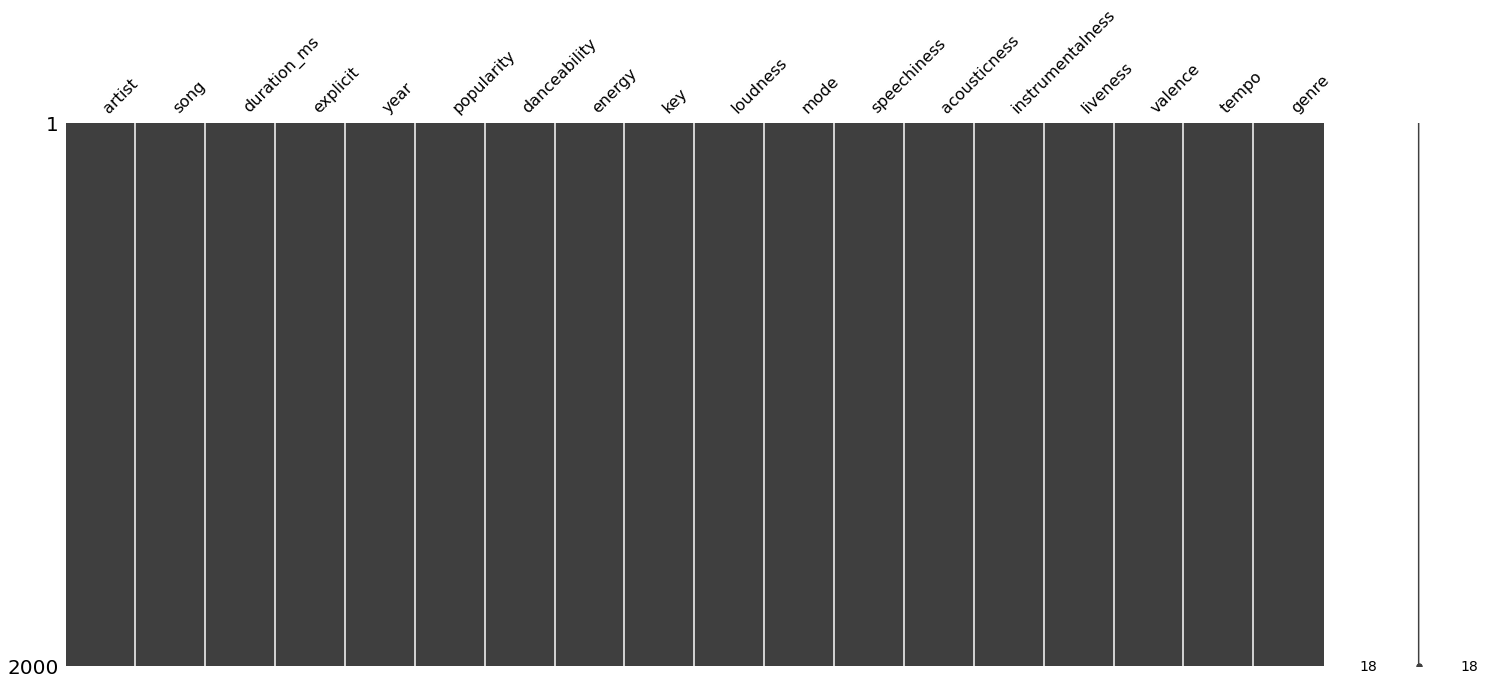

In [5]:
msno.matrix(df_songs)
plt.show()

In [6]:
df_songs.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

In [7]:
df_songs.describe().style.background_gradient(cmap = 'gnuplot')

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.494000,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.859960,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.000000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.000000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.000000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [8]:
df_songs['explicit'].value_counts()

False    1449
True      551
Name: explicit, dtype: int64

In [9]:
df_songs['genre'].apply(lambda x : x.split(','))

0                     [pop]
1              [rock,  pop]
2           [pop,  country]
3            [rock,  metal]
4                     [pop]
               ...         
1995                  [pop]
1996                  [pop]
1997    [hip hop,  country]
1998                  [pop]
1999              [hip hop]
Name: genre, Length: 2000, dtype: object

In [10]:
df_songs['genre'].apply(lambda x : x.split(',')).sum()

['pop',
 'rock',
 ' pop',
 'pop',
 ' country',
 'rock',
 ' metal',
 'pop',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 'pop',
 ' rock',
 'pop',
 ' R&B',
 'Dance/Electronic',
 'pop',
 'pop',
 'pop',
 'rock',
 ' pop',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 'pop',
 'pop',
 'hip hop',
 'rock',
 ' metal',
 'rock',
 ' Folk/Acoustic',
 ' easy listening',
 'pop',
 'hip hop',
 'pop',
 ' Dance/Electronic',
 'metal',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' Dance/Electronic',
 'Dance/Electronic',
 'hip hop',
 ' pop',
 'pop',
 ' R&B',
 'pop',
 'R&B',
 'pop',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' Dance/Electronic',
 'hip hop',
 'pop',
 ' country',
 'pop',
 ' R&B',
 'pop',
 ' latin',
 'pop',
 ' R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 'pop',
 'pop',
 ' R&B',
 'R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'pop',
 ' R&B',
 'pop',
 ' latin',
 'hip hop',
 ' pop',
 ' R&B',
 'hip hop',
 ' pop',
 ' R&B',
 'h

In [11]:
first_genre_list = df_songs['genre'].apply(lambda x : x.split(',')).sum()
first_genre_count = Counter(first_genre_list).most_common()
df_first_genre_count = pd.DataFrame(first_genre_count)
df_first_genre_count.columns = ['first_genre_name', 'count']
df_first_genre_count.head(10)

,first_genre_name,count
0,pop,936
1,hip hop,776
2,pop,697
3,R&B,439
4,Dance/Electronic,349
5,rock,162
6,rock,72
7,metal,57
8,latin,49
9,Dance/Electronic,41


In [18]:
len(df_songs)

2000

In [16]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_first_genre_count, x='energy', y='loudness', hue='genre', palette='rocket_r')
plt.legend(bbox_to_anchor=(1,1.01));

ValueError: Could not interpret value `energy` for parameter `x`

<Figure size 864x432 with 0 Axes>

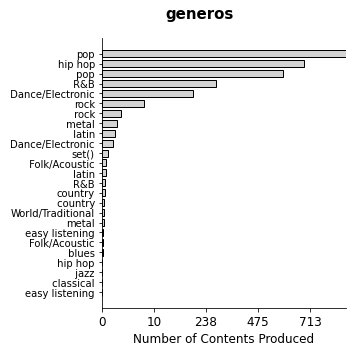

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

xtichlabels = 0, 10, 238, 475, 713, 950

ax.barh(df_first_genre_count.sort_values(by='count')['first_genre_name'],
        df_first_genre_count.sort_values(by='count')['count'],
        color='lightgray', edgecolor='black', linewidth=1, height=0.7
       )

# Hide Spiines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
    
# X axis
ax.set_xlabel("Number of Contents Produced", fontsize=12, fontweight='medium')
ax.set_xticklabels(xtichlabels, fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)

# Title
ax.set_title('generos', fontsize=15, fontweight='bold', x=0.4, y=1.05)

plt.xlim(0,936)
plt.tight_layout()
plt.show()

In [13]:
values = df_songs['explicit'].value_counts()
keys = df_songs['explicit'].unique()
fig = go.Figure(go.Pie(values= values, labels = keys, hole = 0.3))
fig.show()

In [14]:
genre_count.groupby('genre')['genre'].count().plot(y='Quantidade', kind='pie');

NameError: name 'genre_count' is not defined

In [ ]:
#genero por ano

movie_data = data[data['type'] == 'Movie']
TV_data = data[data['type'] == 'TV Show']

In [ ]:
data = df_songs.fillna('Missing')
data['year_added'] = data['date_added'].apply(lambda x : x.split(',')[-1])
data['month_added'] = data['date_added'].apply(lambda x : x.split(',')[0]).apply(lambda x : x.split(' ')[0])

movie_data = data[data['type'] == 'Movie']
TV_data = data[data['type'] == 'TV Show']

In [ ]:
#Genero por ano 

fig, ax = plt.subplots(1, 1, figsize=(5,5))

years = list(reversed(list(movie_data['year_added'].unique())))
x = np.arange(len(years))
movie_y = np.array(list(movie_data['year_added'].value_counts()))
TV_y = np.array(list(TV_data['year_added'].value_counts())[:-1])
width = 0.3

# Movie Bar Plot
ax.bar(x-width/2, movie_y, 
       color='#393E8F', alpha=0.9,
       edgecolor='black', linewidth=1,
       width=width,
       label='movie'      
      )

# TV Bar Plot
ax.bar(x+width/2, TV_y, 
       color='#F3CC64', alpha=0.9,
       edgecolor='black', linewidth=1,
       width=width,
       label='TV'
      )

# Hide Spiines
for s in ["top","right", "left"]:
    ax.spines[s].set_visible(False)

# legend
ax.legend(bbox_to_anchor=(0.5, 0.4, 0.5, 0.5))

# xaxis
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)

# title
ax.set_title('Yearly Added Contents On Disney +', fontsize=15, fontweight='bold', position=(0.5, 1.1))

plt.tight_layout()
plt.show()

KeyError: "None of [Index([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=12000)] are in the [columns]"

In [ ]:
#Músicas por ano

     Name        variable value
0  Olivia      Attendance    60
1    John      Attendance   100
2   Laura      Attendance    80
3     Ben      Attendance    78
4   Kevin      Attendance    95
5  Olivia  Obtained Marks   90%
6    John  Obtained Marks   75%
7   Laura  Obtained Marks   82%
8     Ben  Obtained Marks   64%
9   Kevin  Obtained Marks   45%


In [ ]:
#músicas explicit por ano 

          variable   value
0       Attendance      60
1       Attendance     100
2       Attendance      80
3       Attendance      78
4       Attendance      95
5             Name  Olivia
6             Name    John
7             Name   Laura
8             Name     Ben
9             Name   Kevin
10  Obtained Marks     90%
11  Obtained Marks     75%
12  Obtained Marks     82%
13  Obtained Marks     64%
14  Obtained Marks     45%


In [ ]:
#Explicit por genero

In [ ]:
df_songs.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
#Autor
artist_list = df_songs['artist'].apply(lambda x : x.split(',')).sum()
artist_count = Counter(artist_list).most_common()
df_artist_count = pd.DataFrame(artist_count)
df_artist_count.columns = ['artist_name', 'count']
df_artist_count.head(10)

,artist_name,count
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


In [ ]:
df_artist_top_10 = df_artist_count.iloc[0:10,:]
df_artist_top_10

,artist_name,count
0,Rihanna,25
1,Drake,23
2,Eminem,21
3,Calvin Harris,20
4,Britney Spears,19
5,David Guetta,18
6,Kanye West,17
7,Chris Brown,17
8,Beyoncé,16
9,Katy Perry,16


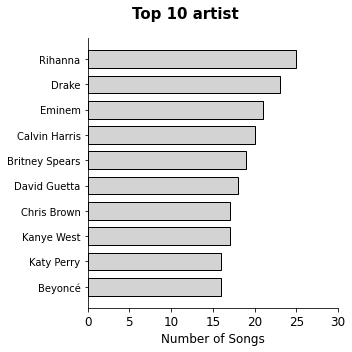

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

xtichlabels = 0, 5, 10, 15, 20, 25, 30

ax.barh(df_artist_top_10.sort_values(by='count')['artist_name'],
        df_artist_top_10.sort_values(by='count')['count'],
        color='lightgray', edgecolor='black', linewidth=1, height=0.7
       )

# Hide Spiines
for s in ["top", "right"]:
    ax.spines[s].set_visible(False)
    
# X axis
ax.set_xlabel("Number of Songs", fontsize=12, fontweight='medium')
ax.set_xticklabels(xtichlabels, fontsize=12)
ax.tick_params(axis='x', which='major', labelsize=12)

# Title
ax.set_title('Top 10 artist ', fontsize=15, fontweight='bold', x=0.4, y=1.05)

plt.xlim(0,30)
plt.tight_layout()
plt.show()

In [ ]:
data = data.fillna('Missing')
data['year_added'] = data['date_added'].apply(lambda x : x.split(',')[-1])
data['month_added'] = data['date_added'].apply(lambda x : x.split(',')[0]).apply(lambda x : x.split(' ')[0])

movie_data = data[data['type'] == 'Movie']
TV_data = data[data['type'] == 'TV Show']

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

years = list(reversed(list(movie_data['year_added'].unique())))
x = np.arange(len(years))
movie_y = np.array(list(movie_data['year_added'].value_counts()))
TV_y = np.array(list(TV_data['year_added'].value_counts())[:-1])
width = 0.3

# Movie Bar Plot
ax.bar(x-width/2, movie_y, 
       color='#393E8F', alpha=0.9,
       edgecolor='black', linewidth=1,
       width=width,
       label='movie'      
      )

# TV Bar Plot
ax.bar(x+width/2, TV_y, 
       color='#F3CC64', alpha=0.9,
       edgecolor='black', linewidth=1,
       width=width,
       label='TV'
      )

# Hide Spiines
for s in ["top","right", "left"]:
    ax.spines[s].set_visible(False)

# legend
ax.legend(bbox_to_anchor=(0.5, 0.4, 0.5, 0.5))

# xaxis
ax.set_xticks(x)
ax.set_xticklabels(years, fontsize=12)

# title
ax.set_title('Yearly Added Contents On Disney +', fontsize=15, fontweight='bold', position=(0.5, 1.1))

plt.tight_layout()
plt.show()

In [ ]:
genre_count = df_songs.copy()
genre_count = pd.concat([genre_count, df_songs['genre'].str.split(',', expand=True)])
genre_count = genre_count.melt(id_vars = ['song', 'explicit'], value_vars = range(3), value_name = 'genre')
genre_count = genre_count[genre_count['genre'].notna()]

In [ ]:
print(genre_count)

      song explicit variable              genre
2000   NaN      NaN        0                pop
2001   NaN      NaN        0               rock
2002   NaN      NaN        0                pop
2003   NaN      NaN        0               rock
2004   NaN      NaN        0                pop
...    ...      ...      ...                ...
11937  NaN      NaN        2   Dance/Electronic
11938  NaN      NaN        2                R&B
11954  NaN      NaN        2   Dance/Electronic
11979  NaN      NaN        2                R&B
11982  NaN      NaN        2                R&B

[3696 rows x 4 columns]


In [ ]:
fig = px.histogram(data_frame= genre_count, x = ['genre'], title="Genre of the Songs")
fig.show()

In [ ]:
import seaborn as sns

In [ ]:
year_avg = df_songs[['danceability','energy','acousticness', 'valence','year']].groupby('year').mean().sort_values(by='year').reset_index()
year_avg.head()

,year,danceability,energy,acousticness,valence
0,1998,0.727000,0.445000,0.339000,0.527000
1,1999,0.668974,0.738421,0.143688,0.574008
2,2000,0.689824,0.748257,0.118339,0.647973
3,2001,0.674130,0.724631,0.145060,0.661041
4,2002,0.675244,0.722567,0.144033,0.575156


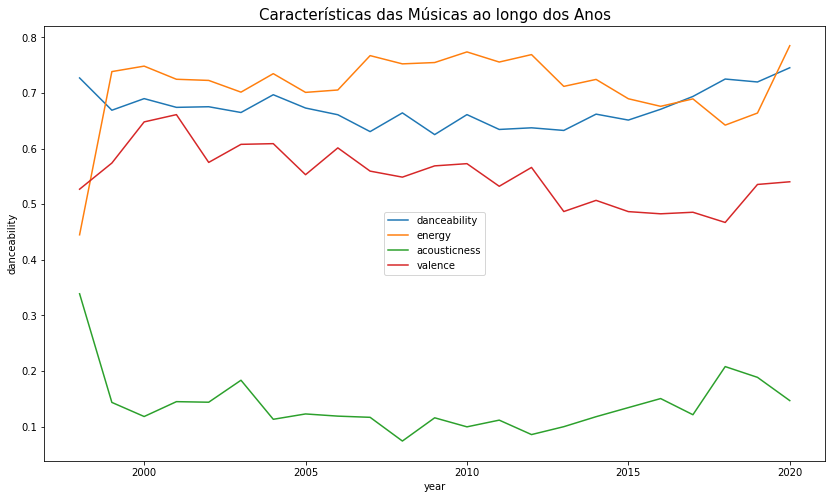

In [ ]:
plt.figure(figsize=(14,8))
plt.title("Características das Músicas ao longo dos Anos", fontsize=15)
lines = ['danceability','energy','acousticness','valence']

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=year_avg)
    
plt.legend(lines)

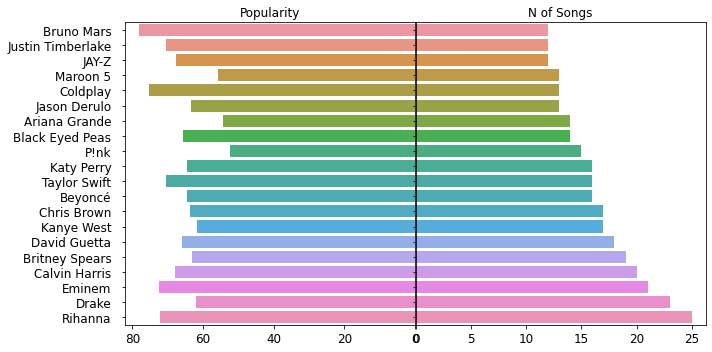

In [ ]:
freq_artists = df_songs.artist.value_counts().nlargest(20)
freq_artists_d = df_songs[df_songs.artist.isin(list(freq_artists.index))]
art_nsongs_pop = pd.DataFrame({'n_songs':freq_artists, 'popularity':freq_artists_d.groupby('artist').mean().popularity})
art_nsongs_pop = art_nsongs_pop.sort_values('n_songs')

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(10,5))
sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='popularity', orient='h', ax = axes[0])
axes[0].set_title('Popularity',fontsize = 12)
axes[0].tick_params(axis='y', pad=10,labelsize =12)
axes[0].tick_params(axis='x',labelsize =12)
axes[0].tick_params(axis='x',labelsize =12)
axes[0].set_xlabel('')
axes[0].invert_xaxis()

sns.barplot(data = art_nsongs_pop, y = art_nsongs_pop.index, x ='n_songs', orient='h', ax = axes[1])
axes[1].set_title('N of Songs',fontsize = 12)
axes[1].tick_params(axis='y', pad=10,labelsize =12)
axes[1].tick_params(axis='x',labelsize =12)
axes[1].set_xlabel('')
    
fig.tight_layout()
fig.subplots_adjust(wspace=0.003)

In [ ]:
artist_list = df_songs.artist.value_counts().index[:5]
df_songs.artist.value_counts()[:5]
df_artist = df_songs[df_songs.artist.isin(artist_list)][['artist','year','energy']].groupby(['artist','year']).count().reset_index()
df_artist.rename(columns={'energy':'song_count'}, inplace=True)
df_artist.head()


,artist,year,song_count
0,Britney Spears,1999,1
1,Britney Spears,2000,2
2,Britney Spears,2001,3
3,Britney Spears,2003,3
4,Britney Spears,2004,1


<AxesSubplot:xlabel='year', ylabel='song_count'>

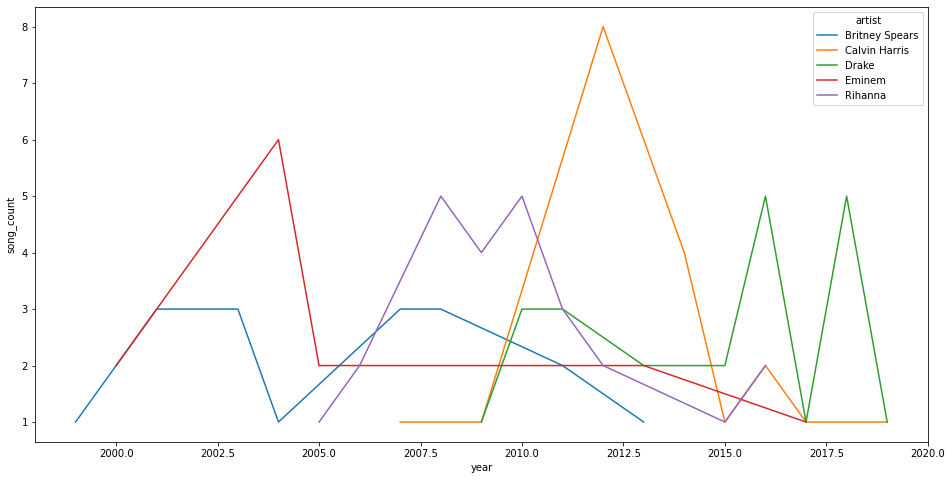

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x='year', y='song_count', hue='artist', data=df_artist)

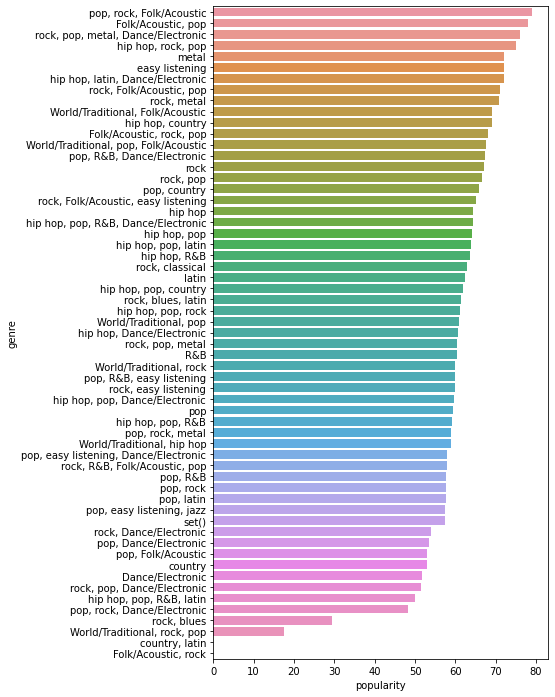

In [ ]:
plt.figure(figsize = (6,12))
popularity_genre = df_songs.groupby('genre').mean().sort_values('popularity', ascending=False)
sns.barplot(data = popularity_genre,y =popularity_genre.index, x = 'popularity', orient='h')
plt.show()